#📌 Extracción

In [168]:
import json
import pandas as pd

df = pd.read_json('TelecomX_Data.json')
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [169]:
df_churn = df[["customerID", "Churn"]].copy()
df_churn

,customerID,Churn
0,0002-ORFBO,No
1,0003-MKNFE,No
2,0004-TLHLJ,Yes
3,0011-IGKFF,Yes
4,0013-EXCHZ,Yes
...,...,...
7262,9987-LUTYD,No
7263,9992-RRAMN,Yes
7264,9992-UJOEL,No
7265,9993-LHIEB,No


In [170]:
df_customer = pd.json_normalize(df["customer"])
df_customer

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


In [171]:
df_phone = pd.json_normalize(df["phone"])
df_phone

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No
...,...,...
7262,Yes,No
7263,Yes,Yes
7264,Yes,No
7265,Yes,No


In [172]:
df_internet = pd.json_normalize(df["internet"])
df_internet

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...
7262,DSL,Yes,No,No,Yes,No,No
7263,Fiber optic,No,No,No,No,No,Yes
7264,DSL,No,Yes,No,No,No,No
7265,DSL,Yes,No,Yes,Yes,No,Yes


In [173]:
df_account = pd.json_normalize(df["account"])
df_account

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.60,593.3
1,Month-to-month,No,Mailed check,59.90,542.4
2,Month-to-month,Yes,Electronic check,73.90,280.85
3,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...
7262,One year,No,Mailed check,55.15,742.9
7263,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,Month-to-month,Yes,Mailed check,50.30,92.75
7265,Two year,No,Mailed check,67.85,4627.65


In [174]:
data = pd.concat([df_churn, df_customer, df_phone, df_internet, df_account], axis=1)
data

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [176]:
data['PhoneService'].unique()

array(['Yes', 'No'], dtype=object)

In [177]:
data['Charges.Total'] = pd.to_numeric(data['Charges.Total'], errors='coerce')
data = data.replace({'Yes': 1, 'No': 0})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


C:\Users\admi\AppData\Local\Temp\ipykernel_3716\2612692996.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({'Yes': 1, 'No': 0})


In [178]:
data['PhoneService'].unique()

array([1, 0], dtype=int64)

In [179]:
data['MultipleLines'].unique()

array([0, 1, 'No phone service'], dtype=object)

In [180]:
data = data.replace({'No phone service': 0, 'No internet service': 0})

C:\Users\admi\AppData\Local\Temp\ipykernel_3716\2935093320.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({'No phone service': 0, 'No internet service': 0})


In [181]:
data[['MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingMovies','StreamingTV','PaperlessBilling']] = data[['MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingMovies','StreamingTV','PaperlessBilling']].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   int32  
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   int32  
 11  OnlineBackup      7267 non-null   int32  
 12  DeviceProtection  7267 non-null   int32  
 13  TechSupport       7267 non-null   int32  
 14  StreamingTV       7267 non-null   int32  
 15  StreamingMovies   7267 non-null   int32  
 16  Contract          7267 non-null   object 


In [182]:
data.isnull().sum()

customerID           0
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
Charges.Monthly      0
Charges.Total       11
dtype: int64

In [183]:
data = data.dropna(subset=['Charges.Total'])
data = data.reset_index(drop=True)

data = data.drop(columns=['customerID', 'PaperlessBilling', 'PaymentMethod'])
data.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,Charges.Monthly,Charges.Total
0,0,Female,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,65.6,593.30
1,0,Male,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,59.9,542.40
2,1,Male,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,73.9,280.85
3,1,Male,1,1,0,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,98.0,1237.85
4,1,Female,1,1,0,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,83.9,267.40


Formato de datos

En esta parte del desafio, ya se extrajeron los datos y se observo que tenian inconsistencias por lo que se hizo una normalizacion de los datos para su mejor manipulacion, posteriormente se realizo una integracion de toda la informacion para generar nuestro banco de datos, por ultimo se realizo un análisis exploratorio de los datos, encontrando que existen columnas que no proporcionan informacion util, algunas con un tipo de dato incoherente y con valores nulos.Formato de datos

En esta parte del desafio, ya se extrajeron los datos y se observo que tenian inconsistencias por lo que se hizo una normalizacion de los datos para su mejor manipulacion, posteriormente se realizo una integracion de toda la informacion para generar nuestro banco de datos, por ultimo se realizo un análisis exploratorio de los datos, encontrando que existen columnas que no proporcionan informacion util, algunas con un tipo de dato incoherente y con valores nulos.

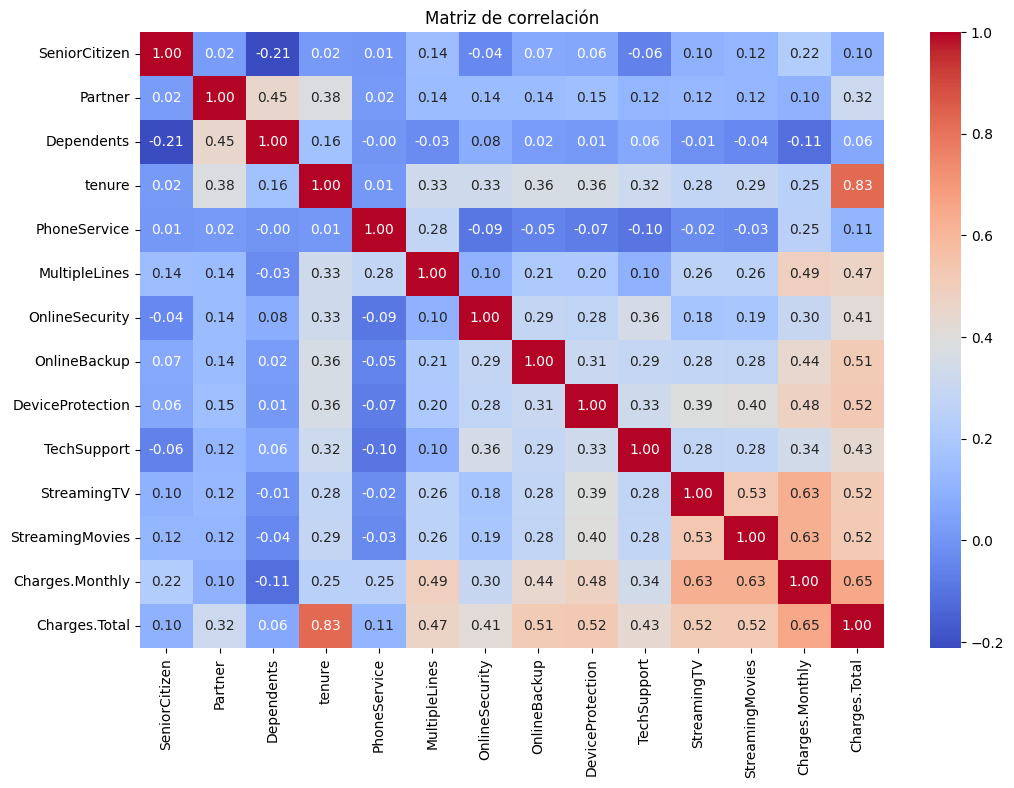

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = data.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

In [185]:
data['Cuentas_Diarias'] = data['Charges.Monthly'] / 30
data.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0,Female,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,65.6,593.30,2.186667
1,0,Male,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,59.9,542.40,1.996667
2,1,Male,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,73.9,280.85,2.463333
3,1,Male,1,1,0,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,98.0,1237.85,3.266667
4,1,Female,1,1,0,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,83.9,267.40,2.796667


#📊 Carga y análisis

In [186]:
desc_stats = data.describe().T 
desc_stats

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7256.0,0.162900,0.369300,0.000000,0.000000,0.000000,0.000000,1.000000
Partner,7256.0,0.483600,0.499765,0.000000,0.000000,0.000000,1.000000,1.000000
Dependents,7256.0,0.299063,0.457879,0.000000,0.000000,0.000000,1.000000,1.000000
tenure,7256.0,32.395535,24.558067,1.000000,9.000000,29.000000,55.000000,72.000000
PhoneService,7256.0,0.902839,0.296197,0.000000,1.000000,1.000000,1.000000,1.000000
MultipleLines,7256.0,0.421858,0.493890,0.000000,0.000000,0.000000,1.000000,1.000000
OnlineSecurity,7256.0,0.285832,0.451841,0.000000,0.000000,0.000000,1.000000,1.000000
OnlineBackup,7256.0,0.344542,0.475252,0.000000,0.000000,0.000000,1.000000,1.000000
DeviceProtection,7256.0,0.342751,0.474662,0.000000,0.000000,0.000000,1.000000,1.000000
TechSupport,7256.0,0.289416,0.453522,0.000000,0.000000,0.000000,1.000000,1.000000


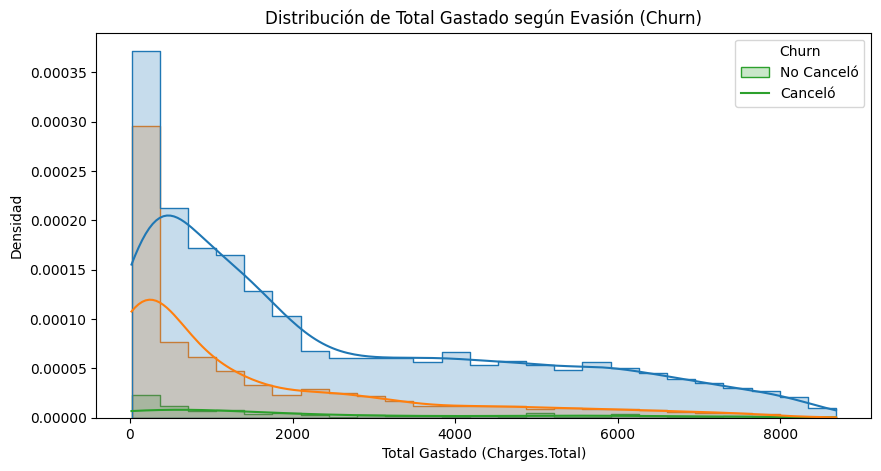

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='Charges.Total', hue='Churn', kde=True, element='step', stat='density')
plt.title('Distribución de Total Gastado según Evasión (Churn)')
plt.xlabel('Total Gastado (Charges.Total)')
plt.ylabel('Densidad')
plt.legend(title='Churn', labels=['No Canceló', 'Canceló'])
plt.show()

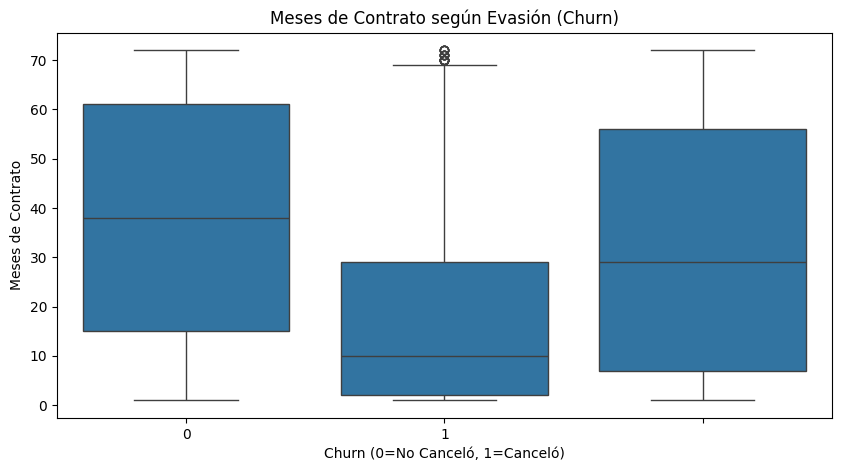

In [189]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x='Churn', y='tenure')
plt.title('Meses de Contrato según Evasión (Churn)')
plt.xlabel('Churn (0=No Canceló, 1=Canceló)')
plt.ylabel('Meses de Contrato')
plt.show()

#📄Informe final

## 🔹 Introducción

El objetivo de este análisis es comprender los factores que influyen en la evasión de clientes (Churn) en TelecomX. La evasión de clientes representa un desafío importante para las empresas de telecomunicaciones, ya que impacta directamente en los ingresos y la estabilidad del negocio. Identificar patrones y variables asociadas con la cancelación de servicios permite diseñar estrategias efectivas para retener clientes y mejorar la satisfacción.



## 🔹 Limpieza y Tratamiento de Datos

- **Importación:** Se cargaron los datos desde un archivo JSON y se normalizaron las estructuras anidadas para obtener un DataFrame plano.
- **Selección y Concatenación:** Se extrajeron y unieron las tablas relevantes: información general, datos de cliente, teléfono, internet y cuenta.
- **Conversión de Tipos:** Se transformaron las variables categóricas ("Yes"/"No") a valores numéricos (1/0) y se convirtieron las columnas numéricas a los tipos de datos adecuados.
- **Manejo de Valores Faltantes:** Se eliminaron filas con valores nulos en variables clave como "Charges.Total".
- **Nuevas Variables:** Se creó la columna `Cuentas_Diarias` para analizar el gasto diario promedio de los clientes.



## 🔹 Análisis Exploratorio de Datos

- **Estadísticas Descriptivas:** Se calcularon métricas como media, mediana y desviación estándar para comprender la distribución de las variables.
- **Visualización de Correlaciones:** Se generó una matriz de correlación para identificar relaciones entre variables.
- **Distribución de Variables Clave:** Se analizaron las distribuciones de "Charges.Total" y "Contract.Months" según la evasión de clientes, utilizando histogramas y boxplots.


## 🔹 Conclusiones e Insights

- Los clientes que cancelan tienden a tener menor tiempo de contrato y, en muchos casos, un gasto total menor.
- Existen variables de servicios (como protección de dispositivos o soporte técnico) que muestran correlación con la evasión.
- La facturación mensual y el gasto diario pueden ser indicadores útiles para identificar clientes en riesgo de cancelar.



In [190]:
data.to_csv('TelecomX.csv', index=False)

# TelecomX LATAM parte 2

A partir de este punto es la parte 2 del challenge utilizando los datos de TelecomX.

## Preparacion de los datos

### Extraccion de datos


### Eliminación de Columnas Irrelevantes

### Encoding

### Verificación de la Proporción de Cancelación (Churn)

### Balanceo de Clases (opcional)

### Normalización o Estandarización (si es necesario)

## 🎯 Correlación y Selección de Variables

### Análisis de Correlación

### Análisis Dirigido

## 🤖 Modelado Predictivo

### Separación de Datos

### Creación de Modelos

### Evaluación de los Modelos

## 📋 Interpretación y Conclusiones

### Análisis de la Importancia de las Variables

### Conclusión